In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    time.sleep(60)

    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [19]:
import requests
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e20a26f230af00fa09468f0817ddb91


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | savannah bight
Processing Record 4 of Set 1 | achi
Processing Record 5 of Set 1 | mitsamiouli
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | khandbari
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | butterworth
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | waipawa
Processing Re

Processing Record 41 of Set 4 | cape town
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | fernley
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | deyskoye
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | ulan-ude
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | port-gentil
Processing Record 3 of Set 5 | shchelyayur
City not found. Skipping...
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | amapa
Processing Record 6 of Set 5 | illela
Processing Record 7 of Set 5 | oussouye
Processing Record 8 of Set 5 | jumilla
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | lasa
Processing Record 11 of Set 5 | kautokeino
Processing Record 12 of Set 5 | nanortalik
Processing Record 13 of Set 5 | lima
Processing Record 14 of Set 5 | 

Processing Record 33 of Set 8 | rambha
Processing Record 34 of Set 8 | plettenberg bay
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 38 of Set 8 | mandapam
Processing Record 39 of Set 8 | maceio
Processing Record 40 of Set 8 | matara
Processing Record 41 of Set 8 | usman
Processing Record 42 of Set 8 | denpasar
Processing Record 43 of Set 8 | swellendam
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | svilajnac
Processing Record 46 of Set 8 | yongan
Processing Record 47 of Set 8 | zomin
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | porto novo
Processing Record 50 of Set 8 | nizhneudinsk
Processing Record 1 of Set 9 | namanga
Processing Record 2 of Set 9 | amga
Processing Record 3 of Set 9 | goma
Processing Record 4 of Set 9 | warqla
City not found. Skipping...
Processing Record 5 of Set 9 | jalu
Processing Record 6

Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | sumbawanga
Processing Record 23 of Set 12 | roebourne
Processing Record 24 of Set 12 | mocuba
Processing Record 25 of Set 12 | tailai
Processing Record 26 of Set 12 | oliveira dos brejinhos
Processing Record 27 of Set 12 | croy
Processing Record 28 of Set 12 | bydgoszcz
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | catuday
Processing Record 31 of Set 12 | metro
Processing Record 32 of Set 12 | mugumu
Processing Record 33 of Set 12 | luangwa
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | awbari
Processing Record 36 of Set 12 | jatiroto
Processing Record 37 of Set 12 | pontianak
Processing Record 38 of Set 12 | pemberton
Processing Record 39 of Set 12 | svetlaya
Processing Record 40 of Set 12 | iracoubo
Processing Record 41 of Set 12 | perth
Processing Record 42 of Set 12 | saint-gaudens
Processing Record 43 of Set 12 | nanzhou
Pr

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


In [24]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.85,68,99,4.21,MV,2021-07-19 18:21:25
1,Kodiak,57.7900,-152.4072,60.31,77,1,6.91,US,2021-07-19 18:21:25
2,Savannah Bight,16.4500,-85.8500,87.01,77,54,13.98,HN,2021-07-19 18:18:08
3,Achi,8.5682,-74.5540,95.54,45,20,2.04,CO,2021-07-19 18:18:08
4,Mitsamiouli,-11.3847,43.2844,78.08,73,42,11.88,KM,2021-07-19 18:21:26
5,Albany,42.6001,-73.9662,82.15,70,93,4.85,US,2021-07-19 18:17:47
6,Khandbari,27.3747,87.2039,72.95,96,100,1.48,NP,2021-07-19 18:18:09
7,Butterworth,5.3991,100.3638,82.99,82,20,2.30,MY,2021-07-19 18:18:10
8,Taltal,-25.4000,-70.4833,65.25,64,77,6.13,CL,2021-07-19 18:18:10
9,Avera,33.1940,-82.5271,86.68,79,100,7.67,US,2021-07-19 18:18:11


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [26]:
city_data_df = city_data_df[new_column_order]

In [27]:
print(city_data_df)

               City Country                 Date      Lat       Lng  Max Temp  \
0         Hithadhoo      MV  2021-07-19 18:21:25  -0.6000   73.0833     82.85   
1            Kodiak      US  2021-07-19 18:21:25  57.7900 -152.4072     60.31   
2    Savannah Bight      HN  2021-07-19 18:18:08  16.4500  -85.8500     87.01   
3              Achi      CO  2021-07-19 18:18:08   8.5682  -74.5540     95.54   
4       Mitsamiouli      KM  2021-07-19 18:21:26 -11.3847   43.2844     78.08   
..              ...     ...                  ...      ...       ...       ...   
573     Sungaipenuh      ID  2021-07-19 18:21:03  -2.0833  101.3833     62.74   
574            Yaan      NG  2021-07-19 18:21:03   7.3833    8.5667     75.36   
575  Virginia Beach      US  2021-07-19 18:19:33  36.8529  -75.9780     80.65   
576        Flinders      AU  2021-07-19 18:14:51 -34.5833  150.8552     51.19   
577        Glotovka      RU  2021-07-19 18:21:04  53.9491   46.7042     71.02   

     Humidity  Cloudiness  

In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


#START AT 6.2.7

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.85,68,99,4.21,MV,2021-07-19 18:21:25
1,Kodiak,57.7900,-152.4072,60.31,77,1,6.91,US,2021-07-19 18:21:25
2,Savannah Bight,16.4500,-85.8500,87.01,77,54,13.98,HN,2021-07-19 18:18:08
3,Achi,8.5682,-74.5540,95.54,45,20,2.04,CO,2021-07-19 18:18:08
4,Mitsamiouli,-11.3847,43.2844,78.08,73,42,11.88,KM,2021-07-19 18:21:26
5,Albany,42.6001,-73.9662,82.15,70,93,4.85,US,2021-07-19 18:17:47
6,Khandbari,27.3747,87.2039,72.95,96,100,1.48,NP,2021-07-19 18:18:09
7,Butterworth,5.3991,100.3638,82.99,82,20,2.30,MY,2021-07-19 18:18:10
8,Taltal,-25.4000,-70.4833,65.25,64,77,6.13,CL,2021-07-19 18:18:10
9,Avera,33.1940,-82.5271,86.68,79,100,7.67,US,2021-07-19 18:18:11


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

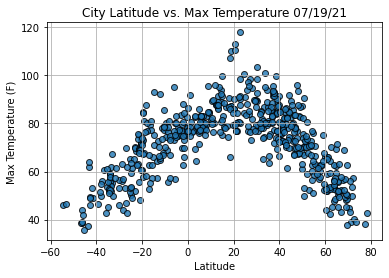

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

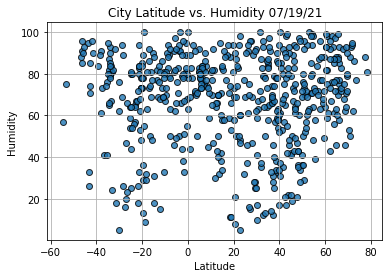

In [36]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

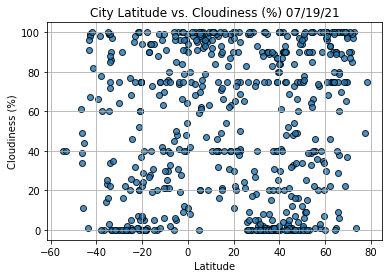

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

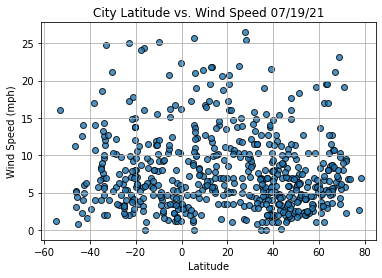

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
